# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [68]:
# откройте данные: ваш код здесь
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/spam_or_not_spam.zip')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [69]:
# рассчитайте частоты для классов : ваш код здесь
print(data['label'].value_counts())
data['label'].value_counts(normalize=True)
#В данных 500 спам-писем (17%) и 2500 не спам-писем (83%). Есть несбалансированность классов


0    2500
1     500
Name: label, dtype: int64


0    0.833333
1    0.166667
Name: label, dtype: float64

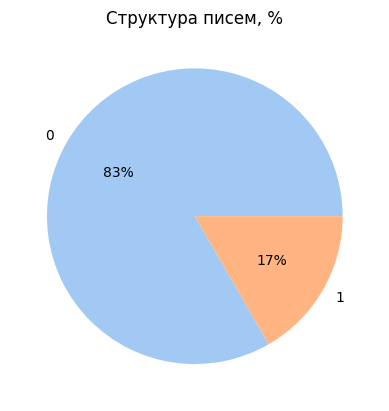

In [70]:
# визуализируйте результат: ваш код здесь
colors = sns.color_palette('pastel')[0:2]

plt.pie(x=data['label'].value_counts(), labels = data['label'].unique(), colors = colors, autopct='%.0f%%')
plt.title('Структура писем, %')
plt.show()


## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [72]:
#ваш код здесь
# пустые ячейки есть в столбце "email" - 1 шт.
data[data['email'].isnull()==True]

# строки из пробелом есть в столбце "email" - 2 шт.
data[data['email']==" "]

#сразу сделаем очистку от лишнего с использванием масок
data = data[(data['email'].isnull()!=True) & (data['email']!=" ")]
#осталось 2997 строк, все - не пустые
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2997 non-null   object
 1   label   2997 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.2+ KB


Переводим данные в векторный вид:

In [73]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [74]:
#ваш код здесь
X.shape[1]
#34116 признаков

34116

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [85]:
#ваш код здесь
X = X.toarray()
y = data['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [86]:
#ваш код здесь
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y,
    test_size=0.25, 
    random_state=42
)

Рассчитайте среднее значение целевой переменной по тестовой выборке. Ответ округлите до третьего знака после запятой

In [88]:
#ваш код здесь
round(y_test.mean(),3)
#0.165

0.165

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром `alpha = 0.01`

In [93]:
# Подходящие алгоритмы
# MultinomialNB  — работает с категориальными признаками, текстами и несбалансированными выборками;
# ComplementNB — улучшенная версия MultinomialNB, стабильно показывает более высокое качество в задачах классификации текстов;
# Попробуем по очереди каждый


#ваш код здесь
alpha = 0.01


#импортируем, обучаем
from sklearn import naive_bayes
from sklearn import metrics

#MultinomialNB 
multi_nb = naive_bayes.MultinomialNB(alpha=alpha)
multi_nb.fit(X_train, y_train)

#предсказываем
y_test_pred_multi = multi_nb.predict(X_test)



# ComplementNB
compl_nb = naive_bayes.ComplementNB(alpha=alpha)
compl_nb.fit(X_train, y_train)

#предсказываем
y_test_pred_compl = compl_nb.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [103]:
#ваш код здесь
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred_multi))
#precision    recall  f1-score
#1.00          0.92      0.96

#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred_compl))
#precision    recall  f1-score
#1.00          0.93      0.96

#Вычислите значения метрик качества accuracy, precision на тестовой выборке. Результат округлите до трёх знаков после точки-разделителя.
print(f'MultinomialNB : accruracy - {round(metrics.accuracy_score(y_test, y_test_pred_multi),3)}, precision - {round(metrics.precision_score(y_test, y_test_pred_multi),3)}; ComplementNB: accruracy - {round(metrics.accuracy_score(y_test, y_test_pred_compl),3)}, precision - {round(metrics.precision_score(y_test, y_test_pred_compl),3)}')

#MultinomialNB : accruracy - 0.987, precision - 1.0; ComplementNB: accruracy - 0.988, precision - 1.0
#ComplementNB показывает чуть лучшие результаты на тестовой выборке

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       626
           1       1.00      0.92      0.96       124

    accuracy                           0.99       750
   macro avg       0.99      0.96      0.98       750
weighted avg       0.99      0.99      0.99       750

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       626
           1       1.00      0.93      0.96       124

    accuracy                           0.99       750
   macro avg       0.99      0.96      0.98       750
weighted avg       0.99      0.99      0.99       750

MultinomialNB : accruracy - 0.987, precision - 1.0; ComplementNB: accruracy - 0.988, precision - 1.0


Нарисуйте ROC-кривую:

ROC-AUC на тестовой выборке: 0.995


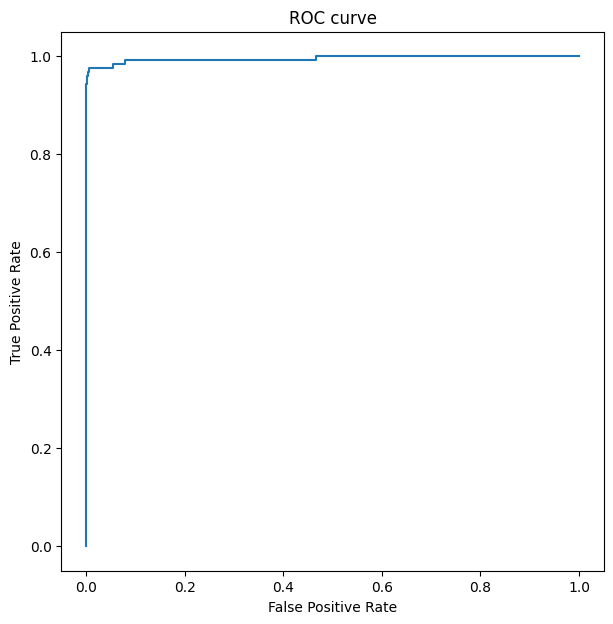

In [112]:
#ваш код здесь
from sklearn.metrics import roc_curve

pred_proba_compl = compl_nb.predict_proba(X_test)
pred_proba_compl = pred_proba_compl[:, 1]

false_positive_rates, true_positive_rates, threshold = roc_curve(y_test, pred_proba_compl)

# создаём график
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, 
         label='Сглаженные значения ROC-AUC')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred_proba_compl).round(3)
print("ROC-AUC на тестовой выборке:", roc_auc_score(y_test, pred_proba_compl).round(3)) 


## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [144]:
from sklearn.model_selection import cross_validate

metrics_list = []

for i in list(np.linspace(0.01, 0.1, 10, dtype=float)):

    #Создаём модель
    model = naive_bayes.ComplementNB(alpha=i)
 
    #Создаём объект кросс-валидатора KFold
    kf = model_selection.KFold(n_splits=5)
 
    #Считаем метрики на кросс-валидации k-fold
    cv_metrics = cross_validate(
        estimator=model, #модель
        X=X, #матрица наблюдений X
        y=y, #вектор ответов y
        cv=kf, #кросс-валидатор
        scoring='accuracy', #метрика
        return_train_score=True 
    )
    metrics_list.append((np.mean(cv_metrics['test_score'])))

[Text(0.5, 1.0, 'accuracy на кросс-валидации'), Text(0.5, 0, 'alpha')]

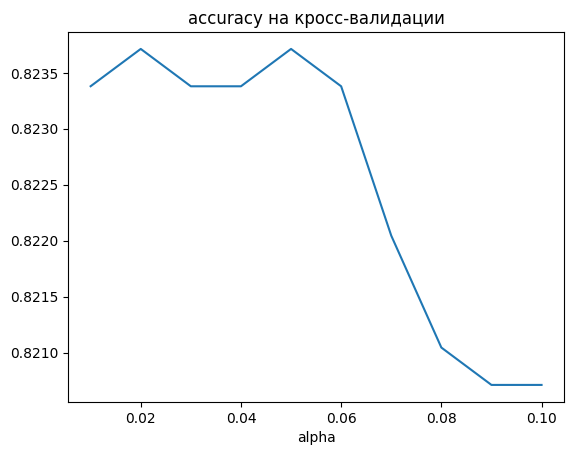

In [145]:
lpt=sns.lineplot(
    x=list(np.linspace(0.01, 0.1, 10, dtype=float)),
    y=metrics_list
)
lpt.set(title='accuracy на кросс-валидации', xlabel='alpha')

#при alpha больше 0.05 при кросс-валидации идёт ухудшение метрики accuracy